In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Building a Robot Simulator in 2D**:
Our robot can observe the world and itself using sensors. In this case, we assume that the robot can sense its location, so at any time step, the sensor reading y(t) measures the robot location y(t)=p(t).

In [2]:
def sense(x):
  return x

Euler integration
The dynamics of the robot assume that the robot control input alters the robot velocity, which is the derivative of the state vector, **x** = u

In [4]:
def simulate(dt, x, u):
    # The control input is equal to the velocity of the robot
    dx = array(u)

    # Euler integration
    x += dt * dx
    return x

**Control policy:** This is the example of a control policy that moves the robot from [1,2] to [3,3]

In [13]:
def control(t, y):
    current_p = y[:2] # current positon
    desired_p = array([3, 3]) # desired_postion

    # Calculate error between current position and desired position
    error = desired_p - current_p

    # Proportional control gains
    Kp_x = 1.0
    Kp_y = 1.0

    # Calculate control inputs
    ux = Kp_x * error[0]
    uy = Kp_y * error[1]

    return array([ux, uy])

**Simulator**

In [17]:
tf = 15.
dt = 0.1    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval

# Initial conditions
x = array([1.0, 2.0])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(dt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

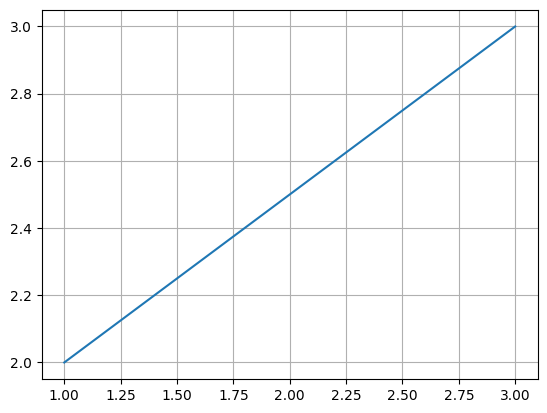

In [18]:
grid()
plot(x_log[:,0], x_log[:,1])

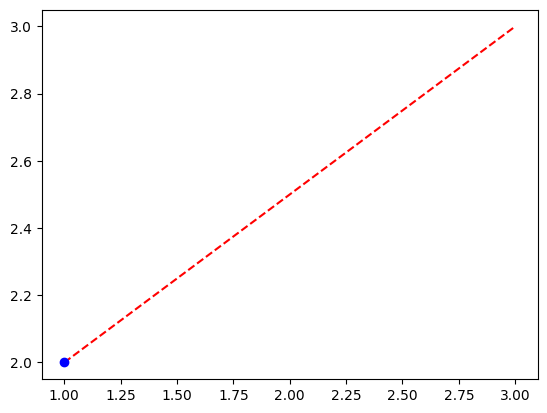

In [19]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:, 0], x_log[:, 1], 'r--')

    # Initial conditions
    ax.plot(x_log[t, 0], x_log[t, 1], 'bo')

anim = animation.FuncAnimation(fig, animate, frames=len(x_log), interval=60)
HTML(anim.to_jshtml())